## 决策树和随机森林
首先介绍一些特别重要的概念

- 信息熵：信息熵H(X)即为随机变量X的平均信息量（期望）
- 信息量：信息量函数应该与事件概率成单调递减关系，概率越大，其信息量越小，譬如概率为1，即百分之一百发送，那这意味着是废话了。没有信息量

![](http://7xkmkg.com1.z0.glb.clouddn.com/063.jpg)

- 联合熵：H(X,Y)
- 条件熵：H(X|Y)
- 相对熵：D(X||Y)
- 互信息：I(X;Y)

更详细的介绍:[3 月机器学习在线班第六课笔记 -- 信息熵与最大熵模型](https://www.zybuluo.com/frank-shaw/note/108124)

决策树需要回答的两个重要问题

- 怎样的决策树才是最好的，选择的规则是什么？
- 每一次选择节点划分的依据是什么？

决策树学习采用的是自顶向下的递归学习，其基本思想是**以信息熵为度量构造一棵熵值下降最快的树，树不断构建的过程也就是熵不断下降的过程。而其中节点的具体特征选择取决于哪个特征在当前节点的熵下降最快。**

### 决策树的生成算法 --ID3、C4.5、CART

ID3：通过互信息（**信息增益**）来衡量熵下降

C4.5：**信息增益率**，相比较于ID3，考虑到了特征本身的信息熵，通过   互信息 / 特征信息熵  作为评判标准

CART：采用**基尼系数**作为衡量标准，而且是一颗二分类树

### 过拟合问题：剪枝、随机森林

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pydotplus
from IPython.display import Image 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [77]:
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
# iris_feature = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

In [78]:
mpl.rcParams['font.family'] = 'STFangsong'#用来正常显示中文标签
# mpl.rcParams['font.sans-serif'] = [u'STKaiti']
mpl.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [79]:
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

In [80]:
# 加载数据
path = "data/iris.data"
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})

In [81]:
x, y = np.split(data, (4,), axis=1)

In [82]:
# 为了数据可视化，我们仅仅使用前两个列特征
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [83]:
model = Pipeline([
        ('ss', StandardScaler()),
        ('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=3))]) #“entropy” for the information gain

In [84]:
model = model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据

In [85]:
from sklearn.datasets import load_iris

更详细的画图相关可以参看：http://scikit-learn.org/stable/modules/tree.html#tree

In [94]:
dot_data = tree.export_graphviz(model.steps[1][1], out_file=None, 
                         feature_names=[u'花萼长度', u'花萼宽度'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)

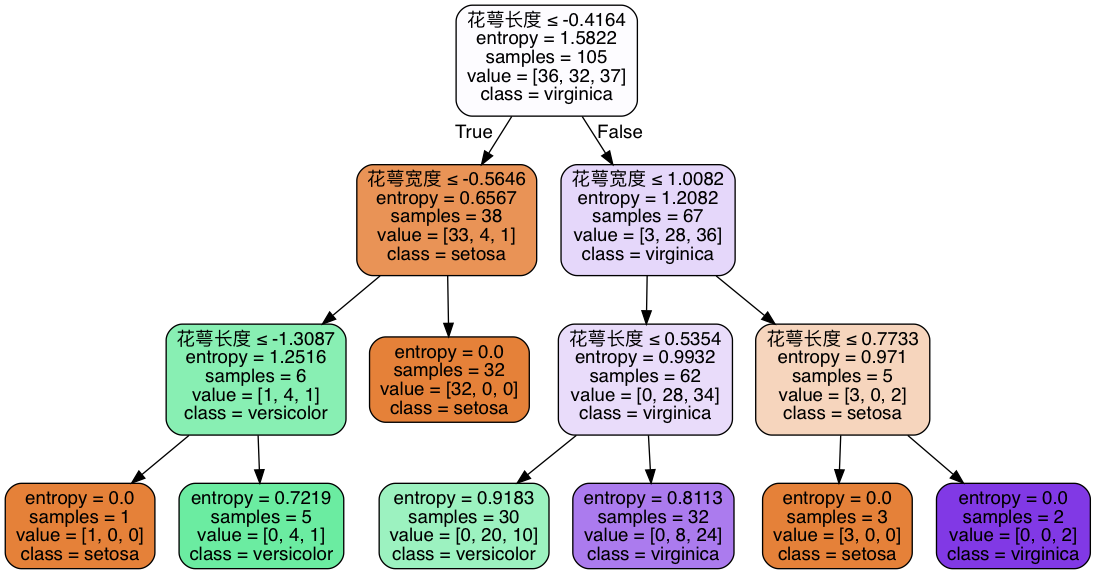

In [95]:
Image(graph.create_png())

In [17]:
f = open('./iris_tree.dot', 'w')
tree.export_graphviz(model.get_params('DTC')['DTC'], out_file=f)

In [18]:
# 画图
N, M = 100, 100  # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

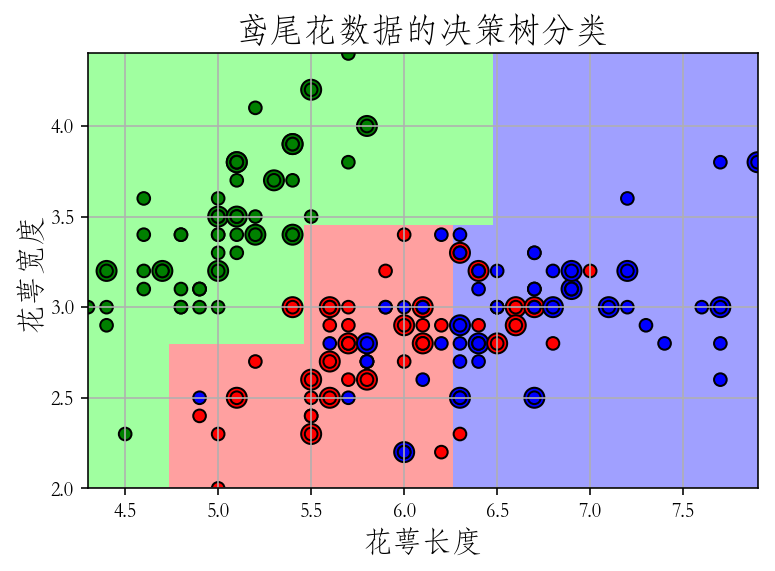

In [64]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), edgecolors='k', s=100, cmap=cm_dark, marker='o')  # 测试数据
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

In [65]:
# 训练集上的预测结果
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

[ 0.  1.  2.  0.  2.  2.  2.  0.  0.  2.  1.  0.  2.  2.  1.  0.  1.  1.
  0.  0.  1.  0.  2.  0.  2.  1.  0.  0.  1.  2.  1.  2.  1.  2.  1.  0.
  1.  0.  2.  2.  2.  0.  1.  2.  2.]
[ 0.  1.  1.  0.  2.  1.  2.  0.  0.  2.  1.  0.  2.  1.  1.  0.  1.  1.
  0.  0.  1.  1.  1.  0.  2.  1.  0.  0.  1.  2.  1.  2.  1.  2.  2.  0.
  1.  0.  1.  2.  2.  0.  2.  2.  1.]
准确度: 80.00%


1  准确度: 44.44%
2  准确度: 40.00%
3  准确度: 20.00%
4  准确度: 24.44%
5  准确度: 24.44%
6  准确度: 28.89%
7  准确度: 37.78%
8  准确度: 40.00%
9  准确度: 37.78%
10  准确度: 37.78%
11  准确度: 37.78%
12  准确度: 37.78%
13  准确度: 35.56%
14  准确度: 35.56%


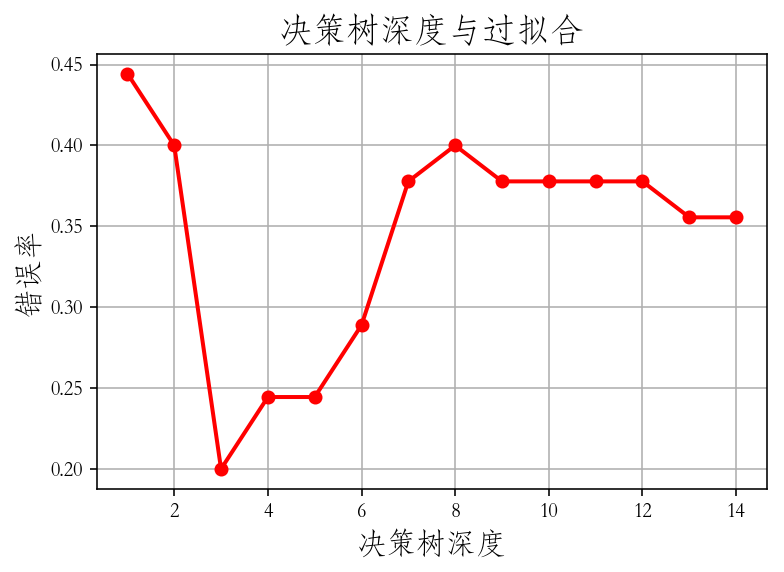

In [66]:
# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf = clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
    err = 1 - np.mean(result)
    err_list.append(err)
    print(d, ' 准确度: %.2f%%' % (100 * err))
plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15)
plt.ylabel(u'错误率', fontsize=15)
plt.title(u'决策树深度与过拟合', fontsize=17)
plt.grid(True)
plt.show()

### 多重特征组合

特征：   花萼长度  +  花萼宽度
	预测正确数目： 123
	准确率: 82.00%
特征：   花萼长度  +  花瓣长度
	预测正确数目： 145
	准确率: 96.67%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 144
	准确率: 96.00%
特征：   花萼宽度  +  花瓣长度
	预测正确数目： 143
	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 147
	准确率: 98.00%


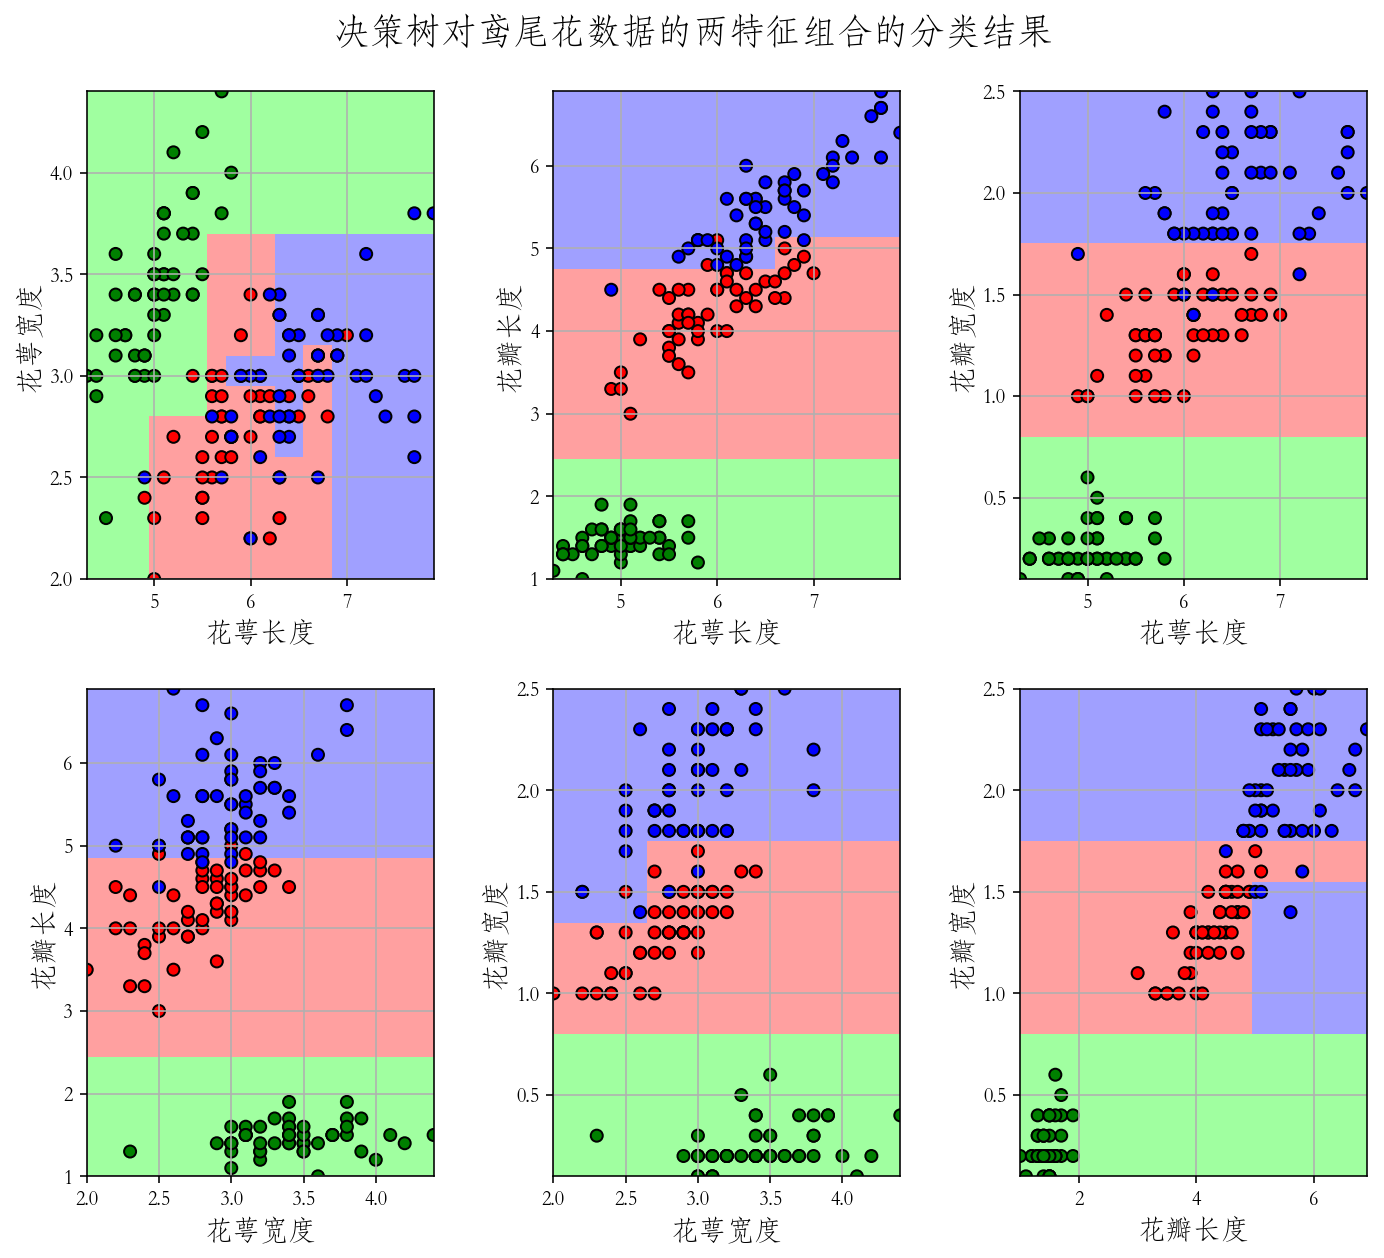

In [96]:
path = 'data/iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x_prime, y = np.split(data, (4,), axis=1)

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[:, pair]

    # 决策树学习
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3) # 每个叶子节点最少有3个数据
    dt_clf = clf.fit(x, y)

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = dt_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('\t预测正确数目：', c)
    print('\t准确率: %.2f%%' % (100 * float(c) / float(len(y))))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = dt_clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.suptitle(u'决策树对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()

### 决策树回归


In [97]:
from sklearn.tree import DecisionTreeRegressor

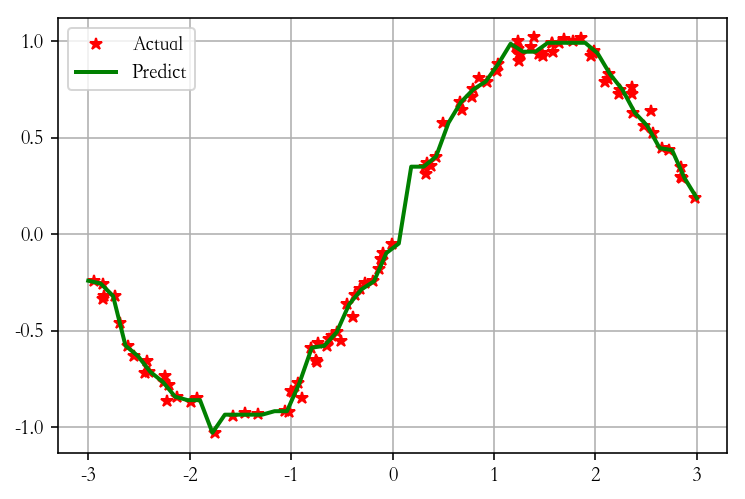

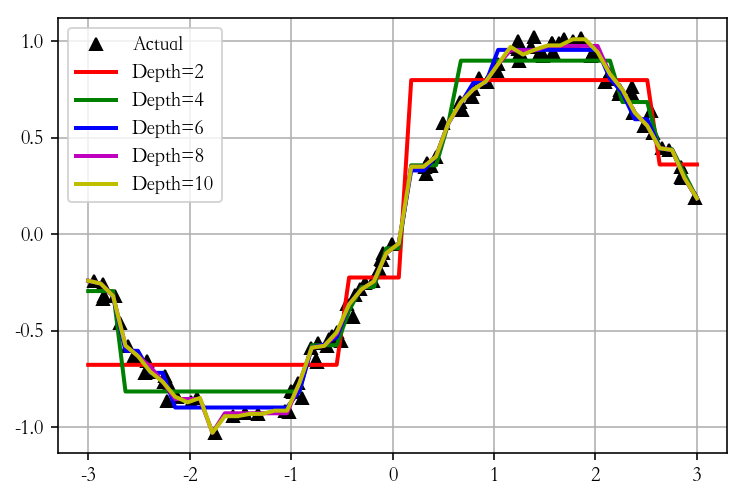

In [98]:
N = 100
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
# print y
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
# print x

reg = DecisionTreeRegressor(criterion='mse', max_depth=9)
dt = reg.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.plot(x, y, 'r*', linewidth=2, label='Actual')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 比较决策树的深度影响
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
reg = [DecisionTreeRegressor(criterion='mse', max_depth=depth[0]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[1]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[2]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[3]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[4])]

plt.plot(x, y, 'k^', linewidth=2, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for i, r in enumerate(reg):
    dt = r.fit(x, y)
    y_hat = dt.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=clr[i], linewidth=2, label='Depth=%d' % depth[i])
plt.legend(loc='upper left')
plt.grid()
plt.show()

### 多输出问题

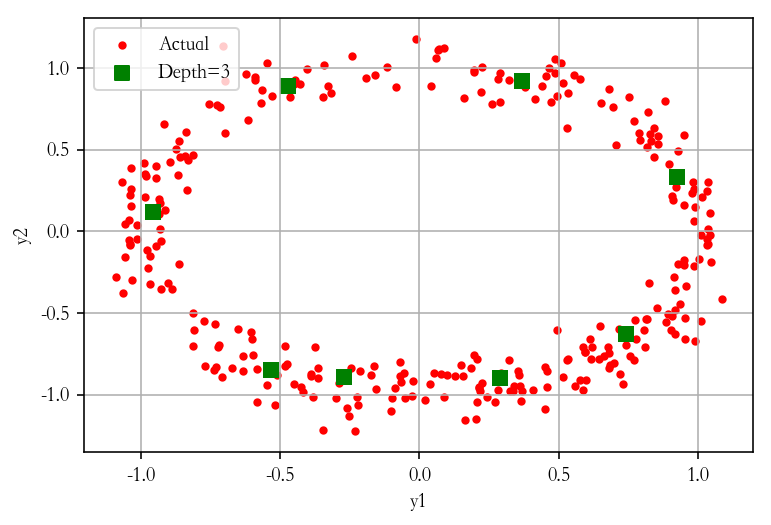

In [110]:
N = 300
x = np.random.rand(N) * 8 - 4     # [-4,4)
x.sort()
# y1 = np.sin(x) + 3 + np.random.randn(N) * 0.1
# y2 = np.cos(0.3*x) + np.random.randn(N) * 0.01
y1 = np.sin(x) + np.random.randn(N) * 0.05
y2 = np.cos(x) + np.random.randn(N) * 0.1
y = np.vstack((y1, y2))
y = np.vstack((y1, y2)).T
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

deep = 3 # 3层可以说是没有什么拟合效果
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(-4, 4, num=1000).reshape(-1, 1)
# print(x_test)
y_hat = dt.predict(x_test)
# print(y_hat)
plt.scatter(y[:, 0], y[:, 1], c='r', s=10, label='Actual')
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='s', s=50, label='Depth=%d' % deep, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()
plt.show()

### 随机森林
随机森林中的 "随机" 是指：

1. Bootstrap 中的随机选择子样本； 
2. Random subspace 的算法从特征集中随机选择 k 个特征，每个树节点分裂时，从这随机的 k 个特征，选择最优的；

完整笔记可以查看: [3 月机器学习在线版第八课笔记 -- 决策树与随机森林](https://www.zybuluo.com/frank-shaw/note/103575)

In [112]:
from sklearn.ensemble import RandomForestClassifier

特征：   花萼长度  +  花萼宽度
	预测正确数目： 126
	准确率: 84.00%
特征：   花萼长度  +  花瓣长度
	预测正确数目： 143
	准确率: 95.33%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣长度
	预测正确数目： 144
	准确率: 96.00%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 146
	准确率: 97.33%


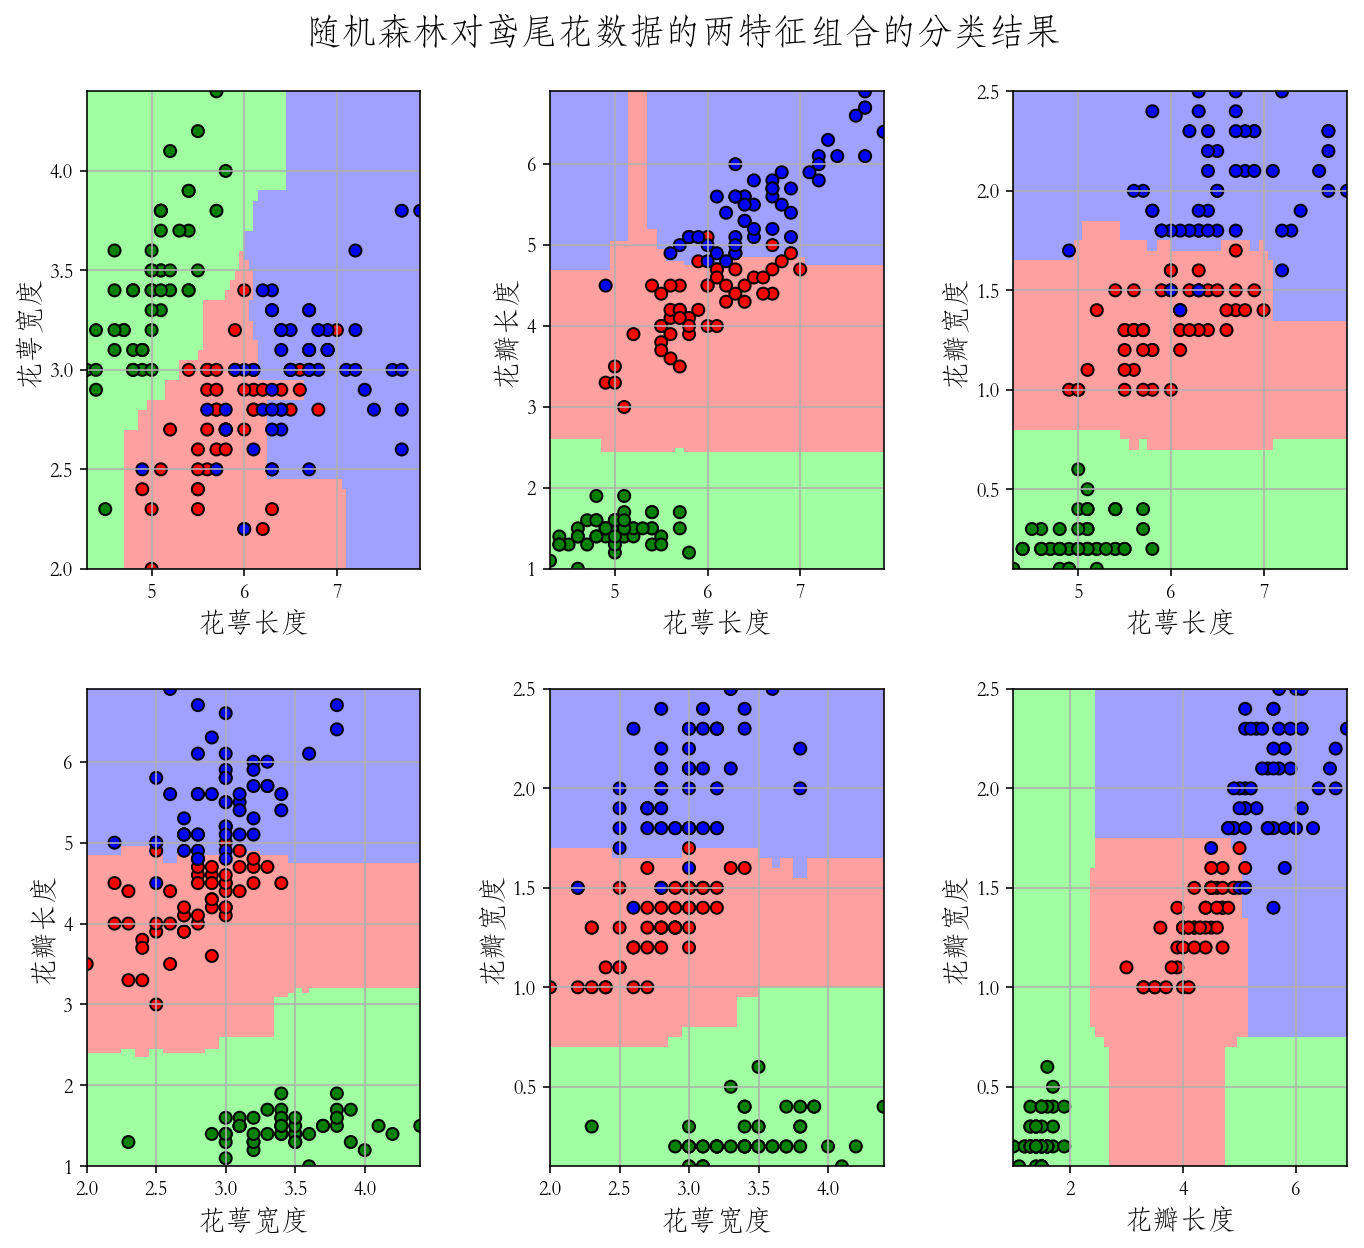

In [113]:
path = 'data/iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x_prime, y = np.split(data, (4,), axis=1)

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[:, pair]

    # 随机森林
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=4)
    rf_clf = clf.fit(x, y.ravel())

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = rf_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('\t预测正确数目：', c)
    print('\t准确率: %.2f%%' % (100 * float(c) / float(len(y))))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = rf_clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.show()

### GBDT算法
我们通过提升boosting方法来提升我们的预测，boosting 算法相比较于 随机森林的不同，可以参看：[为什么 xgboost/gbdt 在调参时为什么树的深度很少就能达到很高的精度？](https://www.zhihu.com/question/45487317)

对于 Bagging 算法来说，由于我们会并行地训练很多不同的分类器的目的就是降低这个方差 (variance) , 因为采用了相互独立的基分类器多了以后，预测的值自然就会靠近. 所以对于每个基分类器来说，目标就是如何降低这个偏差（bias), 所以我们会采用深度很深甚至不剪枝的决策树。

对于 Boosting 来说，每一步我们都会在上一轮的基础上更加拟合原数据，所以可以保证偏差（bias）, 所以对于每个基分类器来说，问题就在于如何选择 variance 更小的分类器，即更简单的分类器，所以我们选择了深度很浅的决策树。

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
path = 'data/iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x_prime, y = np.split(data, (4,), axis=1)

In [123]:
est = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                max_depth=1, random_state=0, loss='deviance').fit(x_prime, y.ravel())

In [136]:
est.feature_importances_ # 可以说特征3，4比较重要
print(iris_feature[2],iris_feature[3])
print(est.score(x_prime, y.ravel()))

花瓣长度 花瓣宽度
0.986666666667


### Adaboost

In [137]:
from sklearn.ensemble import AdaBoostClassifier

特征：   花萼长度  +  花萼宽度
	预测正确数目： 110
	准确率: 73.33%
特征：   花萼长度  +  花瓣长度
	预测正确数目： 144
	准确率: 96.00%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 144
	准确率: 96.00%
特征：   花萼宽度  +  花瓣长度
	预测正确数目： 103
	准确率: 68.67%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 105
	准确率: 70.00%
特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 146
	准确率: 97.33%


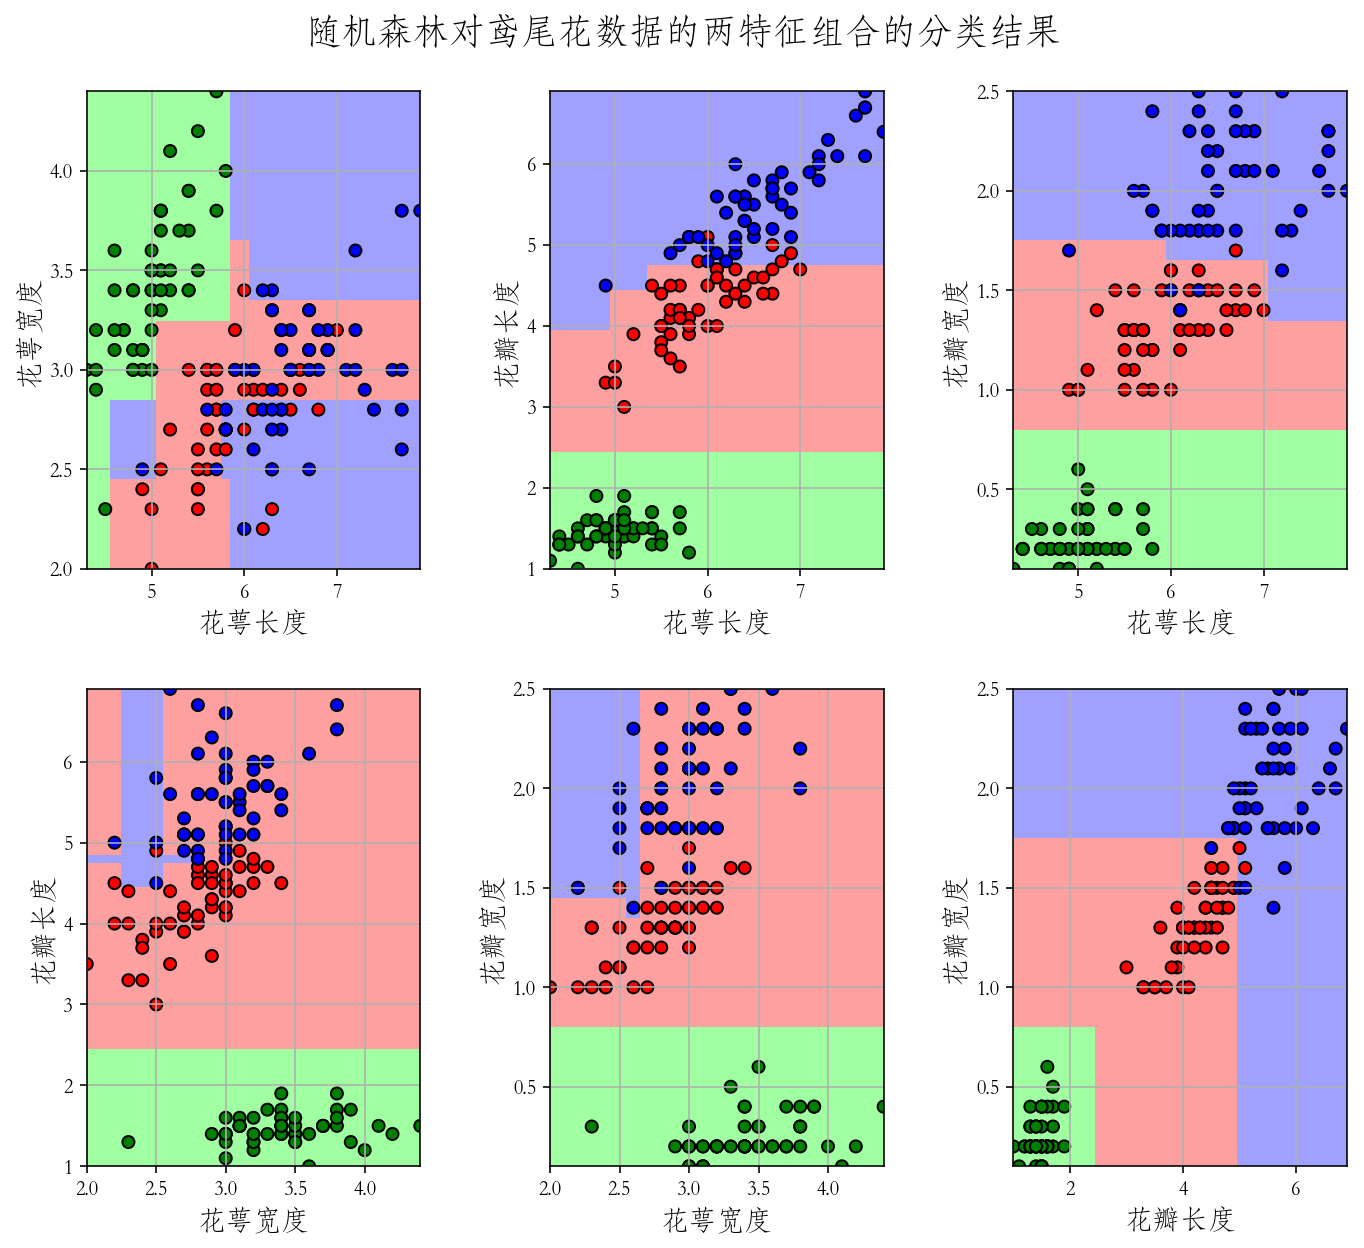

In [138]:
path = 'data/iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x_prime, y = np.split(data, (4,), axis=1)

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[:, pair]

    # 随机森林
    clf = AdaBoostClassifier(n_estimators=200)
    rf_clf = clf.fit(x, y.ravel())

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = rf_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('\t预测正确数目：', c)
    print('\t准确率: %.2f%%' % (100 * float(c) / float(len(y))))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = rf_clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.show()

## 问题记录
对于特征值是连续值的怎么处理？

![](http://scikit-learn.org/stable/_images/math/18b1a49e164e731a75bb626f23ecce70fdf0a181.png)